This notebook demonstrates both **Agglomerative** and **Divisive** hierarchical clustering techniques on mall customer data using `Annual Income`, `Spending Score` , `Age` and `Gender` features.

**What is Hierarchical Clustering?**

Hierarchical clustering builds a tree-like structure (dendrogram) to show how data points are merged or split into clusters.

### Types:
1. **Agglomerative** (Bottom-Up):  
   Start with each point as a separate cluster, then merge step by step.
   
2. **Divisive** (Top-Down):  
   Start with all points in one cluster, then recursively split.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

- Source: `Mall_Customers.csv` from Kaggle
- Features used:
  - `Age`
  - `Annual Income (k$)`
  - `Spending Score (1-100)`
  - `GenderEncoded` (from `Gender` using Label Encoding)

In [40]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Preprocessing Steps**

1. Load the dataset from the given path
2. Encode `Gender` using `LabelEncoder`
3. Select relevant features for clustering
4. Scale features using `StandardScaler` (DBSCAN is distance-based)

In [41]:
le = LabelEncoder()
df['GenderEncoded'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

In [42]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'GenderEncoded']]

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

**Agglomerative Clustering**

1. We use `AgglomerativeClustering` from `sklearn` with:
   - `n_clusters=4`
   - `linkage='ward'` (minimizes intra-cluster variance)

2. We also visualize the **dendrogram** using `scipy.cluster.hierarchy.dendrogram()` to show the merge hierarchy.

3. Final cluster assignments are visualized using a scatterplot.



In [48]:
agg_model = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels_agg = agg_model.fit_predict(X_scaled)

In [49]:
df["agg_labels"] = labels_agg

In [50]:
print(df[:10])

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   
5           6  Female   22                  17                      76   
6           7  Female   35                  18                       6   
7           8  Female   23                  18                      94   
8           9    Male   64                  19                       3   
9          10  Female   30                  19                      72   

   GenderEncoded  agg_labels  
0              1           1  
1              1           1  
2              0           0  
3              0           1  
4              0           0  

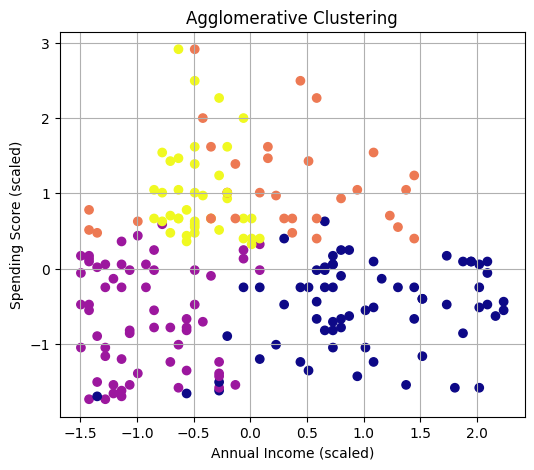

In [51]:
plt.figure(figsize=(6, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_agg, cmap='plasma')
plt.title("Agglomerative Clustering")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.grid(True)
plt.show()

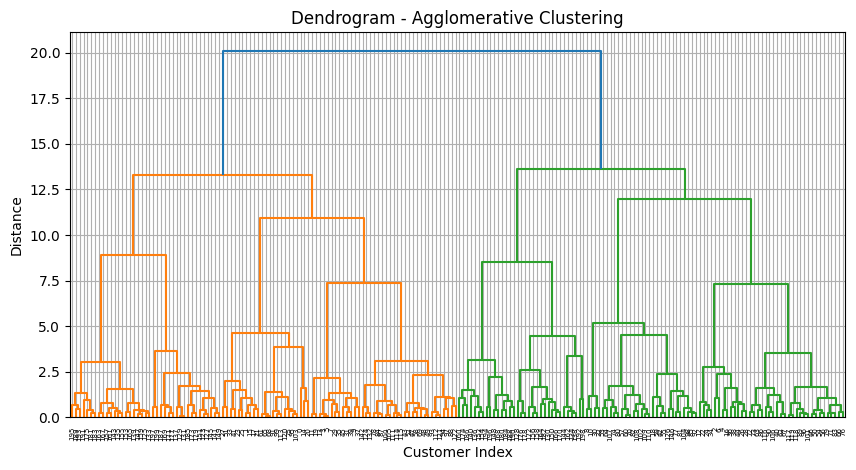

In [52]:
import scipy.cluster.hierarchy as sch

linked = sch.linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
sch.dendrogram(linked)
plt.title("Dendrogram - Agglomerative Clustering")
plt.xlabel("Customer Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

**Divisive Clustering (Simulated)**

- Since `sklearn` doesn't support divisive clustering directly, we simulate it using:
  - `scipy.cluster.hierarchy.linkage()` to build the tree (top-down)
  - `fcluster(..., t=4, criterion='maxclust')` to cut the tree into 4 clusters

- This gives us a **top-down split** into flat clusters
- We visualize the resulting clusters with a scatter plot

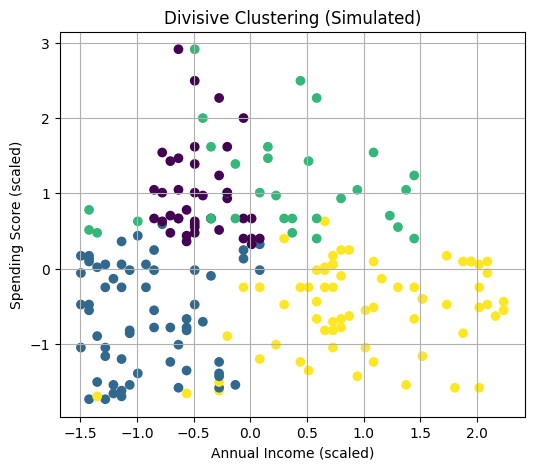

In [54]:
from scipy.cluster.hierarchy import fcluster

# linkage is already computed above (linked)
# Now cut tree from the top into 3 clusters
labels_div = fcluster(linked, t=4, criterion='maxclust')

# Plot clusters
plt.figure(figsize=(6, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_div, cmap='viridis')
plt.title("Divisive Clustering (Simulated)")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.grid(True)
plt.show()


This notebook helps understand both hierarchical approaches and how to visualize and extract flat clusters from tree structures.